In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.datasets import load_iris
from src.cnn import CNN

### Cargar datos

In [15]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df['target'] = [iris.target_names[i] for i in iris.target]

In [16]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [17]:
df.shape

(150, 5)

### Graficar datos Originales

In [18]:
columnas = ['petal length (cm)', 'sepal width (cm)', 'target']

df = df[df['target'] != 'setosa']
df = df[df['petal length (cm)'] <= 5.3]
df = df[columnas]
df.head()

,petal length (cm),sepal width (cm),target
50,4.7,3.2,versicolor
51,4.5,3.2,versicolor
52,4.9,3.1,versicolor
53,4.0,2.3,versicolor
54,4.6,2.8,versicolor


In [19]:
print(df['target'].value_counts())
mayor = df['target'].value_counts().max()
menor = df['target'].value_counts().min()
print(f'IR: {np.round(mayor/menor, 4)}')

target
versicolor    50
virginica     20
Name: count, dtype: int64
IR: 2.5


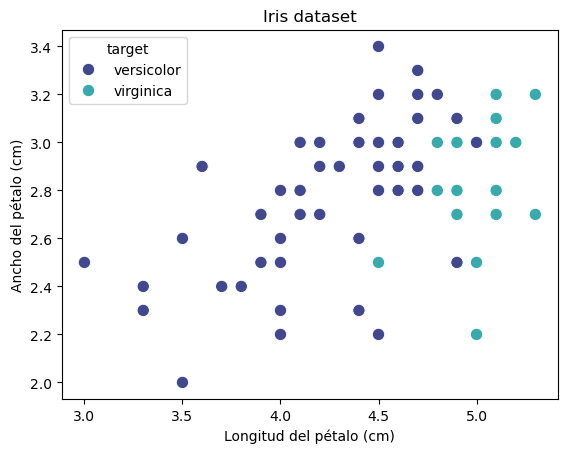

In [20]:
sns.scatterplot(
    data=df,
    x=columnas[0],
    y=columnas[1],
    hue='target',
    palette='mako',
    s=80
)
plt.title('Iris dataset')
plt.xlabel('Longitud del pétalo (cm)')
plt.ylabel('Ancho del pétalo (cm)')
plt.show()

In [21]:
df.to_csv('data/iris_df.csv', index=False)

### Aplicación del algoritmo Condensed Nearest Neighbors

In [22]:
X = df[['petal length (cm)', 'sepal width (cm)']].values
y = df['target'].values

inicio = time.time()
print('Iniciando algoritmo Condensed Nearest Neighbors...')
df_cnn = CNN(X, y)
final = time.time()
print('Algoritmo finalizado.')
print(f'Tiempo de ejecución: {round(final - inicio, 4)} segundos')

Iniciando algoritmo Condensed Nearest Neighbors...
Algoritmo finalizado.
Tiempo de ejecución: 0.0186 segundos


In [23]:
df_cnn.columns = columnas
df_cnn.head()

,petal length (cm),sepal width (cm),target
0,4.7,3.2,versicolor
1,5.1,2.7,virginica
2,4.9,2.5,versicolor
3,5.0,2.2,virginica
4,5.0,2.5,virginica


In [24]:
print(df_cnn['target'].value_counts())
mayor = df_cnn['target'].value_counts().max()
menor = df_cnn['target'].value_counts().min()
print(f'IR: {np.round(mayor/menor, 4)}')

target
versicolor    8
virginica     8
Name: count, dtype: int64
IR: 1.0


### Graficar datos CNN

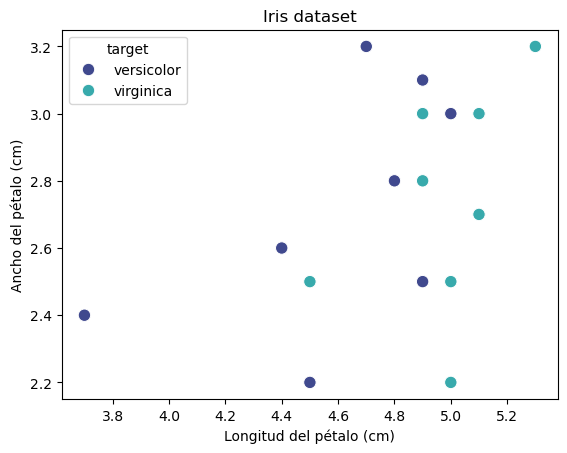

In [25]:
sns.scatterplot(
    data=df_cnn,
    x=columnas[0],
    y=columnas[1],
    hue='target',
    palette='mako',
    s=80
)
plt.title('Iris dataset')
plt.xlabel('Longitud del pétalo (cm)')
plt.ylabel('Ancho del pétalo (cm)')
plt.show()

In [26]:
df_cnn.to_csv('data/iris_cnn.csv', index=False)